# ARIMA
### Jonathan Balaban
In regession and classification, we use features (collected during a cross-sectional study/survey/measurement) to predict an outcome. The model and parameters represent part of the underlying relationship between features and outcome. But what if we run out of funds to cross-section, or need to predict future outcomes for which the features don't exist yet?

Enter [Autoregressive Integrated Moving Average (ARIMA)](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) modeling. When we have autocorrelation between outcomes and their ancestors, we will see a theme, or relationship in the outcome plot. This relationship can be modeled in its own way, allowing us to predict the future with a confidence level commensurate to the strength of the relationship and the proximity to known values (prediction weakens the further out we go).

![](assets/nonstationary.gif)

Notice that time series data has four general characteristics:
- Trend: growth or decay over time
- Cycles: repeating patterns
- Seasonality: repeating patterns in relation to human time blocks
    - 3 days, 1 week, 3 months (quarterly), 8 years, etc.
- Random walk: unaccountable variation due to nature
    - If a series is mostly random, the average may be the pest prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#set figsize
plt.rcParams['figure.figsize'] = (20.0, 6.0)

data = pd.read_csv('data/rossmann.csv', skipinitialspace=True, low_memory=True)

# set the DateTime index
data['Date']= pd.to_datetime(data['Date'])
data = data.set_index('Date')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [3]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [4]:
# Filter to Store 1
store1 = data[data.Store == 1]


store1.sort_index(inplace=True)
store1.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1
2013-01-02,1,3,5530,668,1,0,0,1
2013-01-03,1,4,4327,578,1,0,0,1
2013-01-04,1,5,4486,619,1,0,0,1
2013-01-05,1,6,4997,635,1,0,0,1


In [5]:
# Filter to open days
store1 = store1[store1.Open == 1]

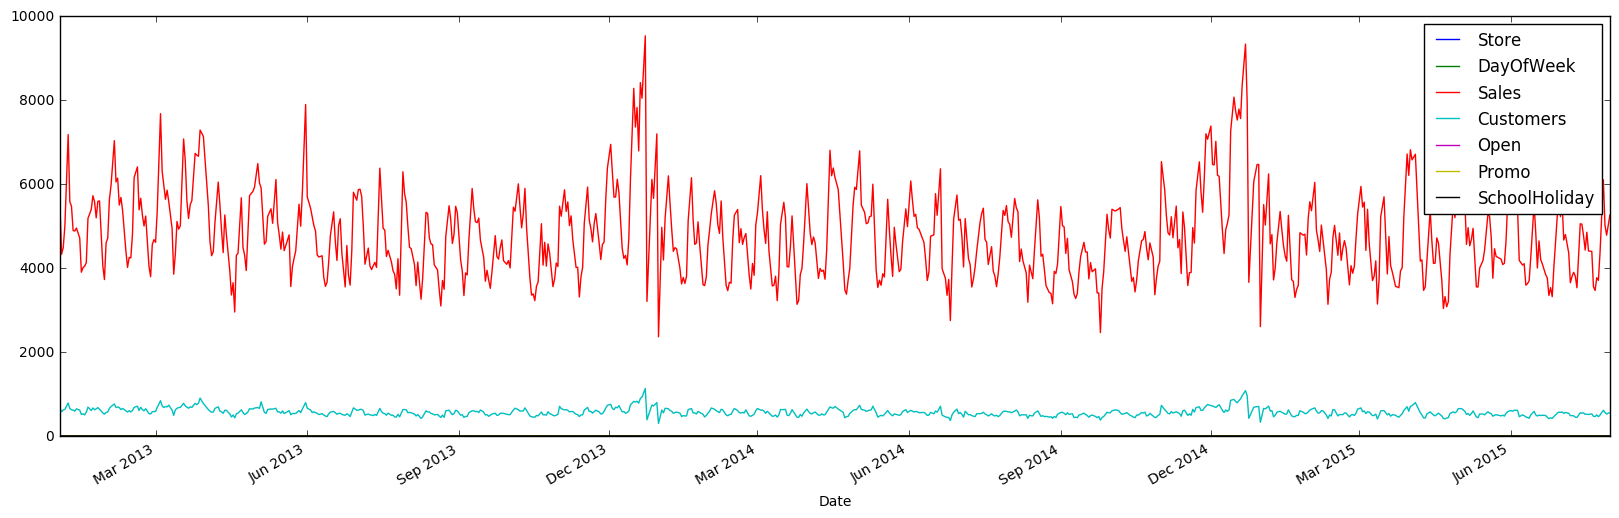

In [6]:
# Plot the sales over time
store1.plot()

In [7]:
store1.Sales.pct_change().head

<bound method Series.head of Date
2013-01-02         NaN
2013-01-03   -0.217541
2013-01-04    0.036746
2013-01-05    0.113910
2013-01-07    0.436062
2013-01-08   -0.222408
2013-01-09   -0.019534
2013-01-10   -0.105831
2013-01-11   -0.002249
2013-01-12    0.014546
2013-01-14   -0.047456
2013-01-15   -0.173203
2013-01-16    0.027692
2013-01-17    0.008982
2013-01-18    0.020524
2013-01-19    0.255634
2013-01-21    0.040911
2013-01-22    0.060438
2013-01-23   -0.024825
2013-01-24   -0.068663
2013-01-25    0.075265
2013-01-26    0.002148
2013-01-28   -0.275634
2013-01-29   -0.081381
2013-01-30    0.235168
2013-01-31    0.023473
2013-02-01    0.196220
2013-02-02    0.059826
2013-02-04    0.177889
2013-02-05   -0.139790
                ...   
2015-06-27    0.211637
2015-06-29    0.293108
2015-06-30    0.103521
2015-07-01   -0.089276
2015-07-02    0.064139
2015-07-03   -0.160669
2015-07-04    0.028296
2015-07-06   -0.091307
2015-07-07   -0.162652
2015-07-08    0.040274
2015-07-09    0.026337


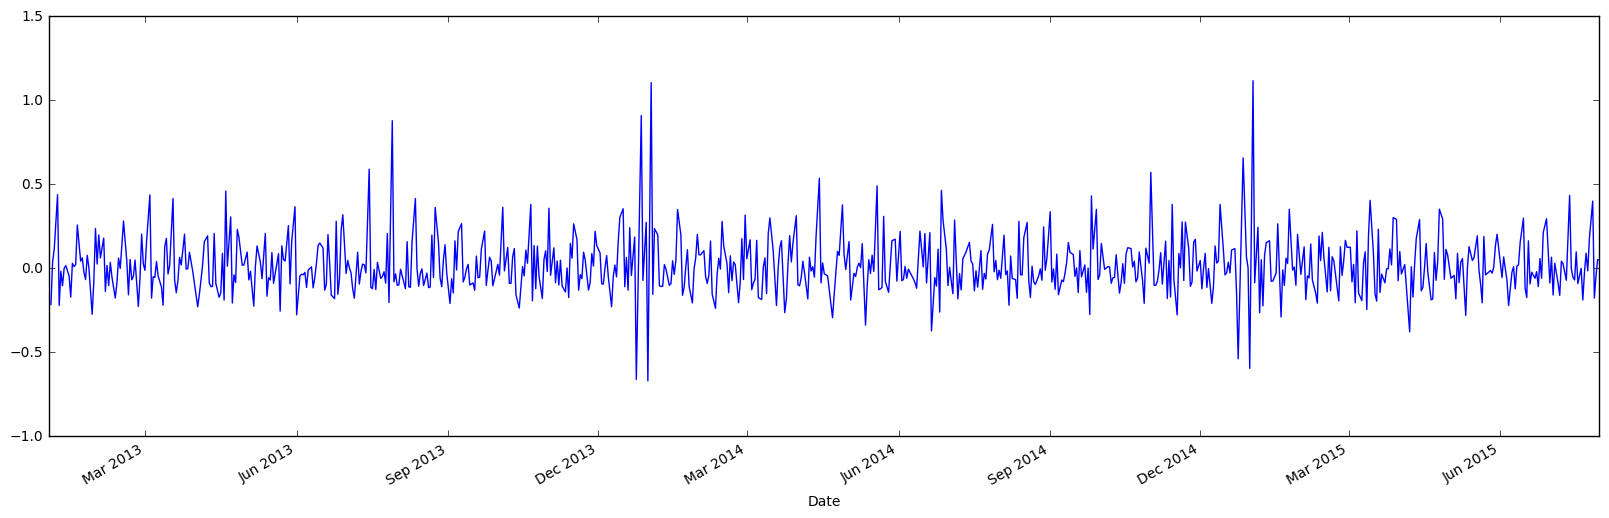

In [8]:
store1.Sales.pct_change().plot()

In [9]:
# print Sales autocorrelation for k=1,2

print 'Lag1', store1.Sales.autocorr(lag=1)
print 'Lag2', store1.Sales.autocorr(lag=2)

Lag1 0.682690824228
Lag2 0.481217266146


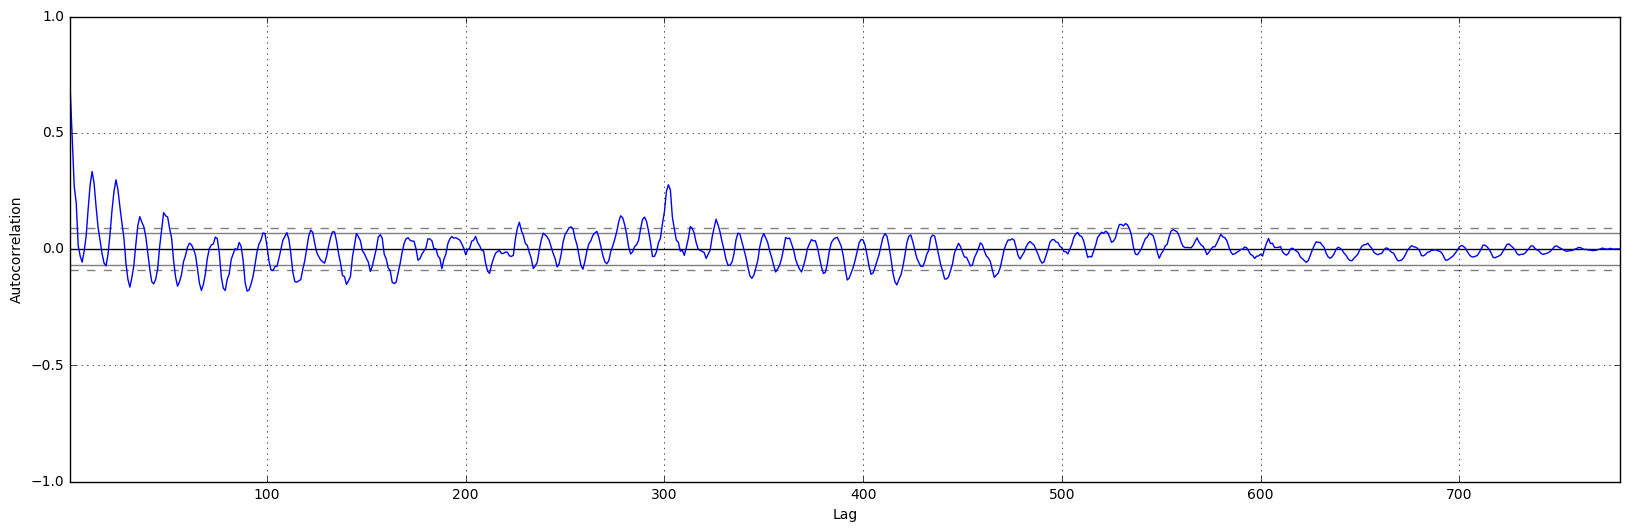

In [10]:
# create autocorr plot
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(store1.Sales)

In [11]:
store1.Sales.diff().autocorr()

-0.18144101447610664

(0, 10)

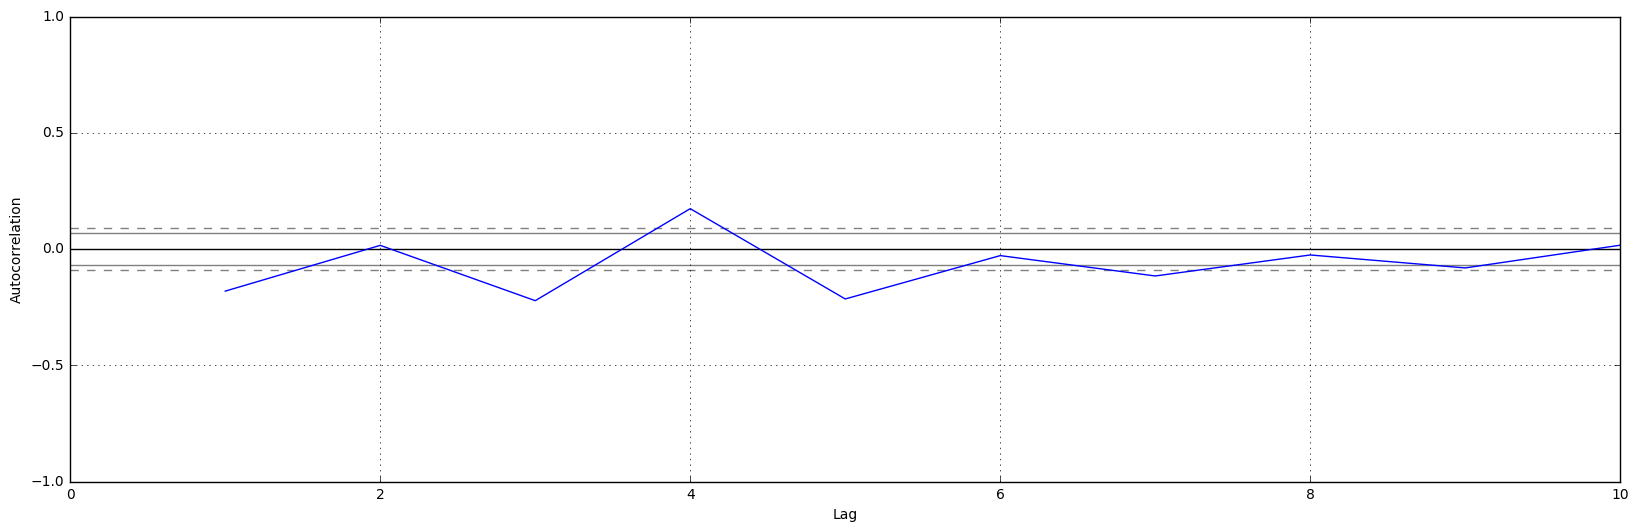

In [31]:
autocorrelation_plot(store1.Sales.diff()[1:])
plt.xlim(0,10)

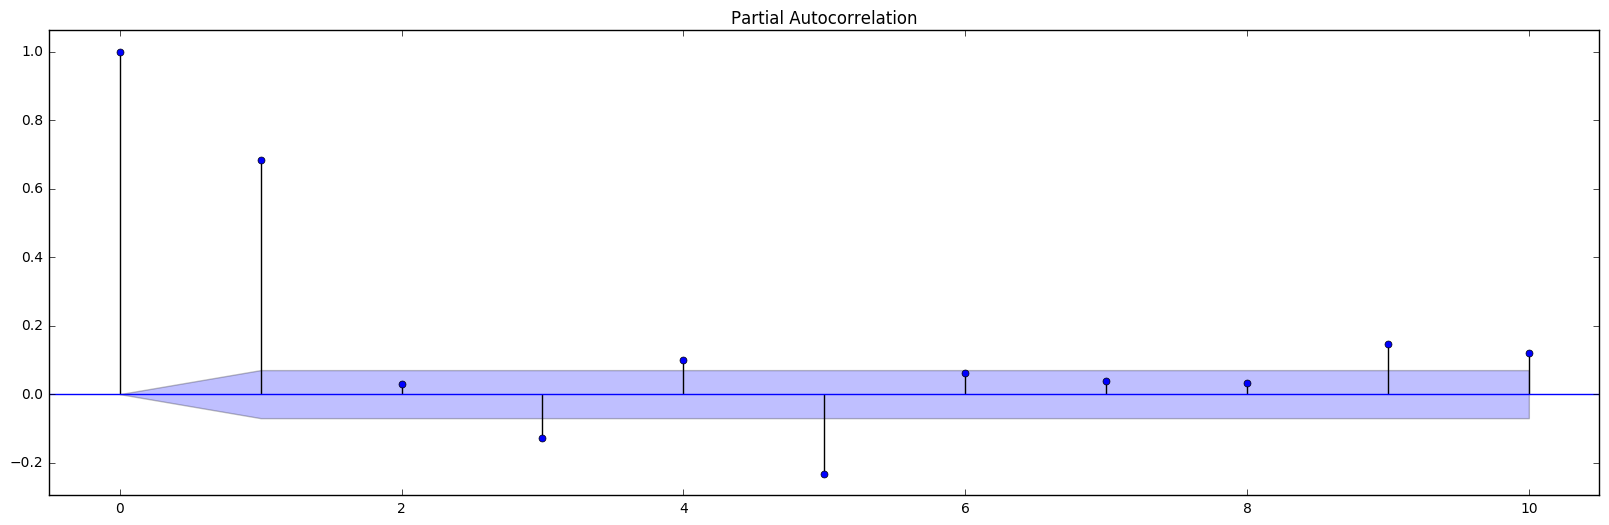

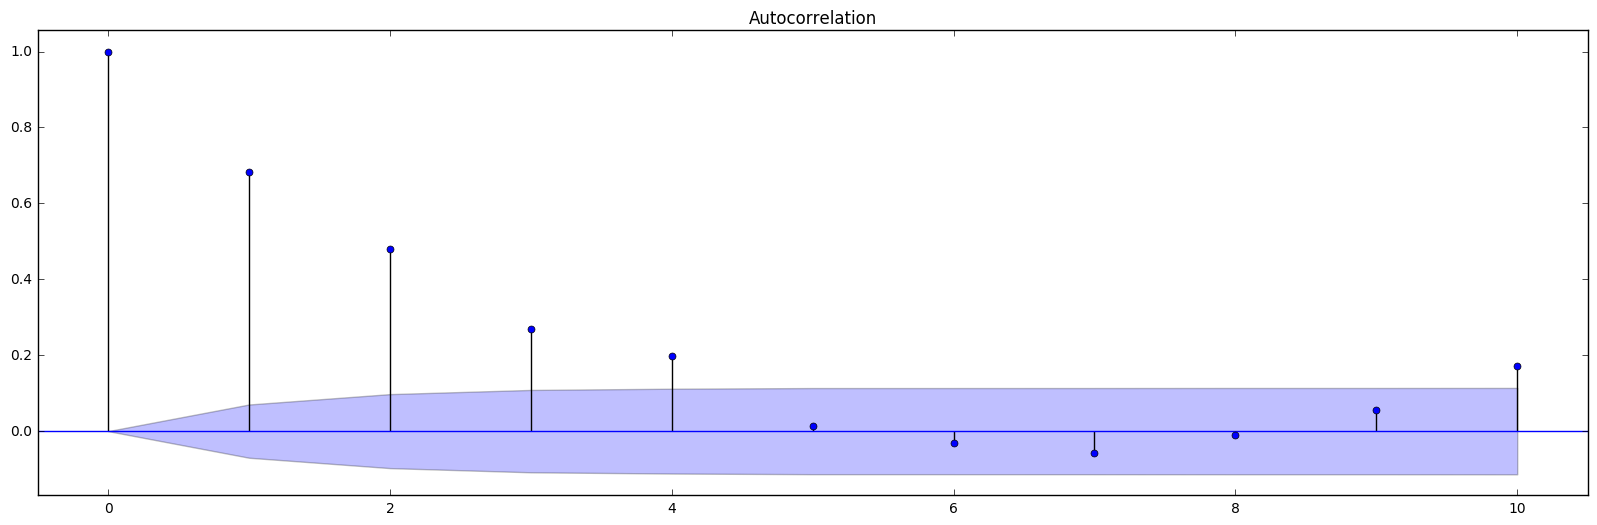

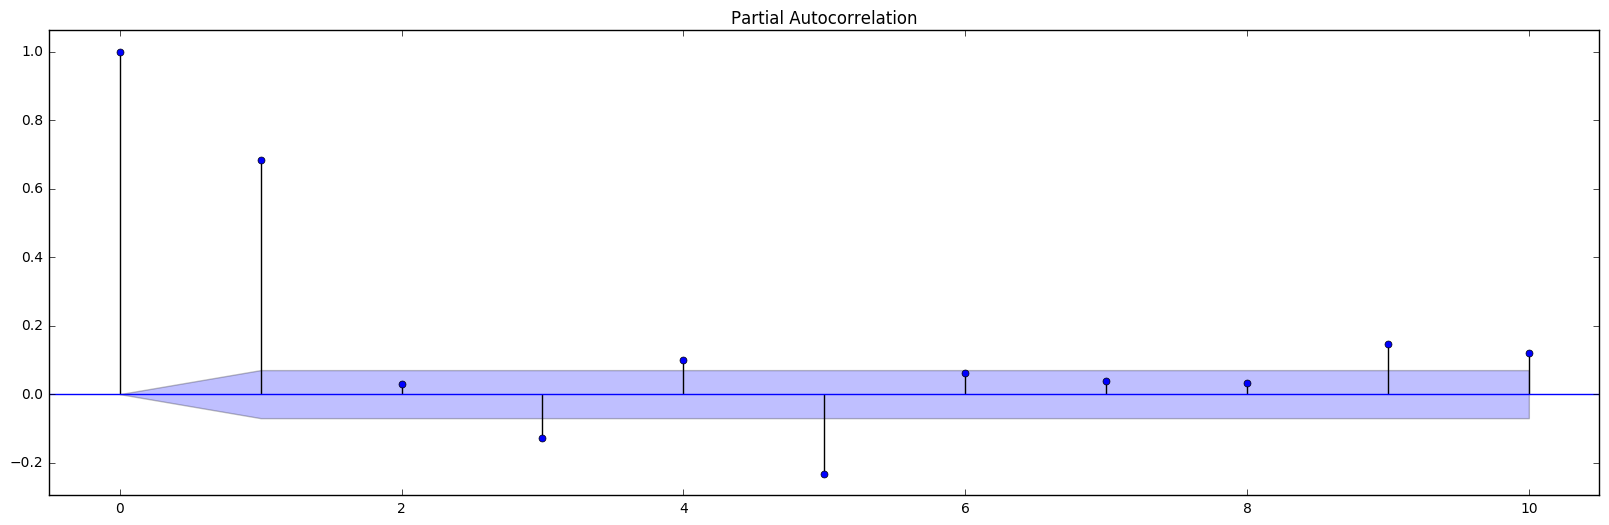

In [25]:
# plot autocorr with statsmodel
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(store1.Sales, lags=10)
plot_pacf(store1.Sales, lags=10)

In [ ]:


autocorrelation_plot(store1.Sales.diff()[1:])
plt.xlim(0,10)

Here we observe autocorrelation at 10 lag values. 1 and 2 are what we saw before. This implies a small, but limited impact based on the last few values, suggesting that an autoregressive model might be useful.

Check: We also observe a larger spike at 7 - what does that mean?

That's the amount of days in a week!
If we observed a handful of randomly distributed spikes - that would imply a MA model may be useful. This is because those random spikes suggest that at some point in time, something changed in the world and all values are shifted up down from there in a fixed way.

That may be the case here, but if we expand the window we can see that the spikes occur regularly at 7 days windows. This means we have a weekly cycle!

In [6]:
# plot ACF and PACF


## ARMA

In [7]:
# build arma10 model
from statsmodels.tsa.arima_model import ARMA
store1s = store1[['Sales']].astype(float)

In [8]:
# plot residuals


In [9]:
# plot acf

fcast = store1s.forecast(90)
total = np.concatenate((df1.Sales,fcast[0]), axis=0)

plt.figure()
plt.plot(total)
plt.plot(fcast[0], "r--")

In [10]:
# plot actual vs. predicted


# Weekly

In [17]:
store1_wk = store1.Sales.resample('W').astype(float)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called astype(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


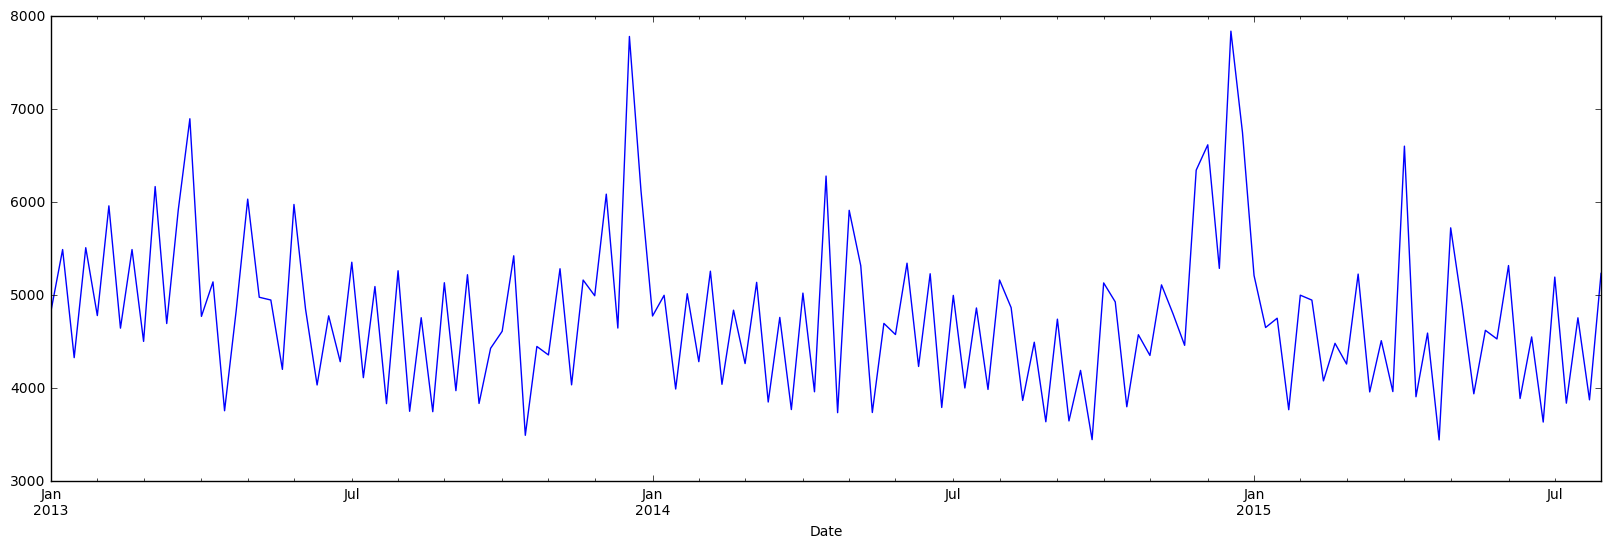

In [18]:
store1_wk.plot()

In [36]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


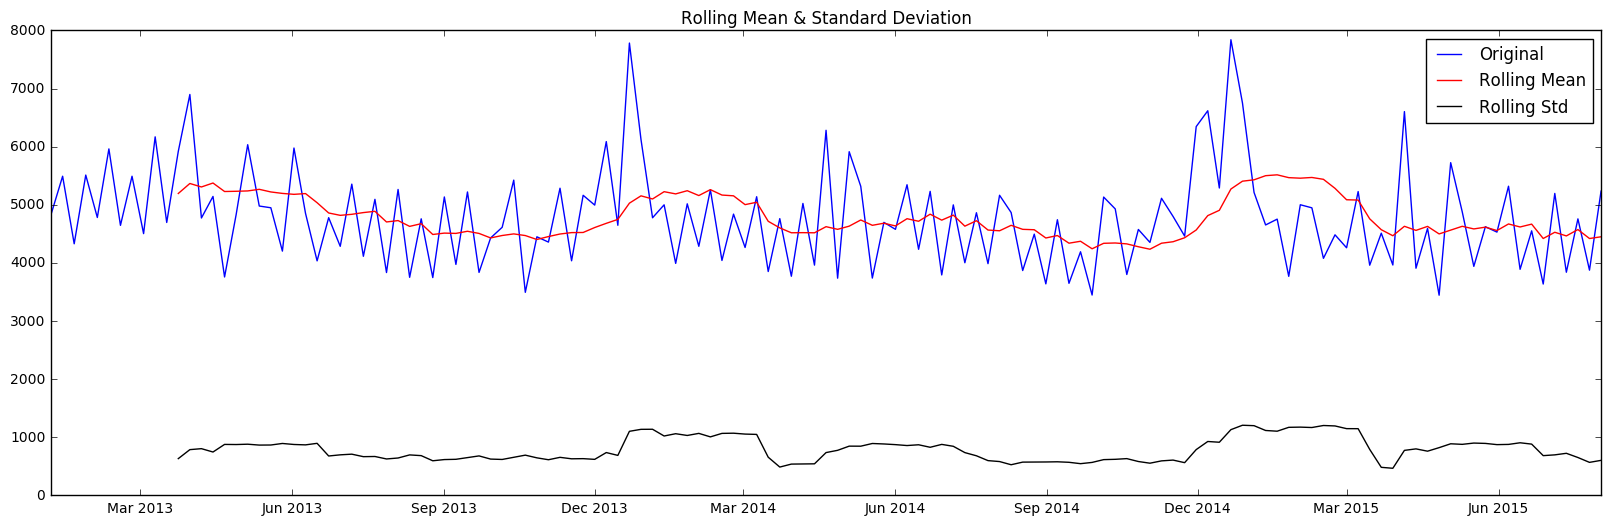

Results of Dickey-Fuller Test:
Test Statistic                  -3.757988
p-value                          0.003368
#Lags Used                       3.000000
Number of Observations Used    131.000000
Critical Value (5%)             -2.883868
Critical Value (1%)             -3.481282
Critical Value (10%)            -2.578677
dtype: float64


In [37]:
test_stationarity(store1_wk)

In [21]:
import numpy as np

In [23]:
print np.std(store1_wk)
print np.std(store1_wk.diff())
print np.std(store1_wk.diff().diff())
print np.std(store1_wk.diff().diff().diff())

837.94406288
1190.66883413
2192.46847876
4187.72143935


Figure(1440x432)
Figure(1440x432)


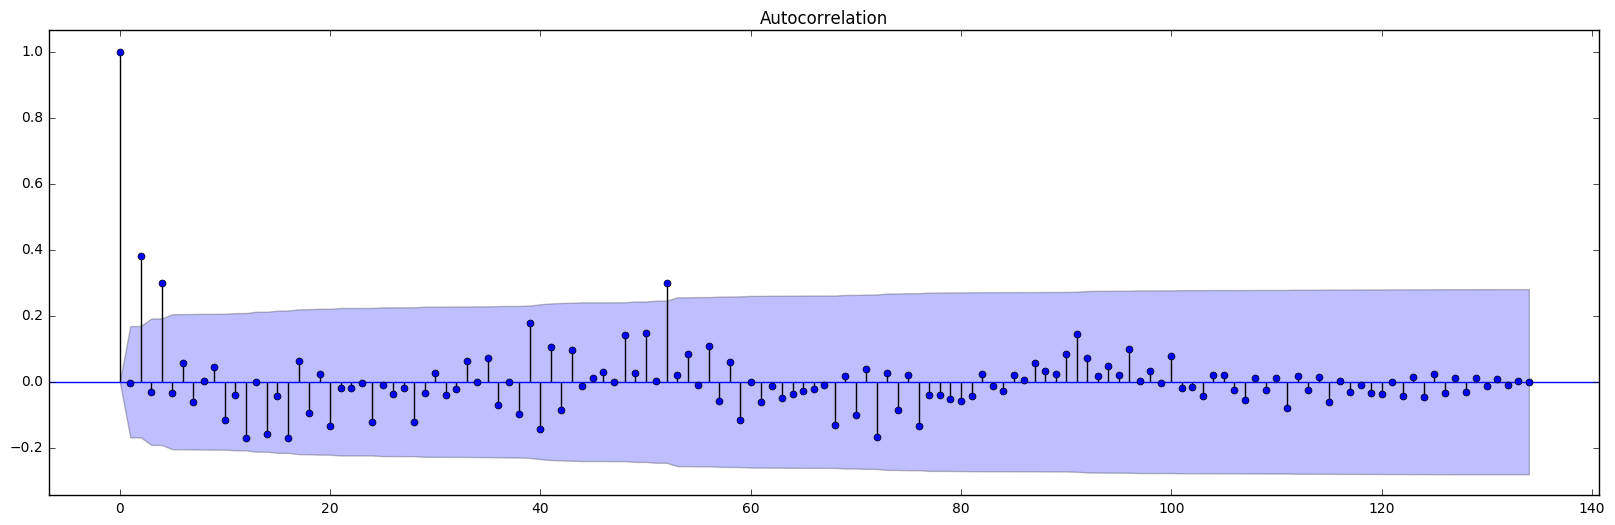

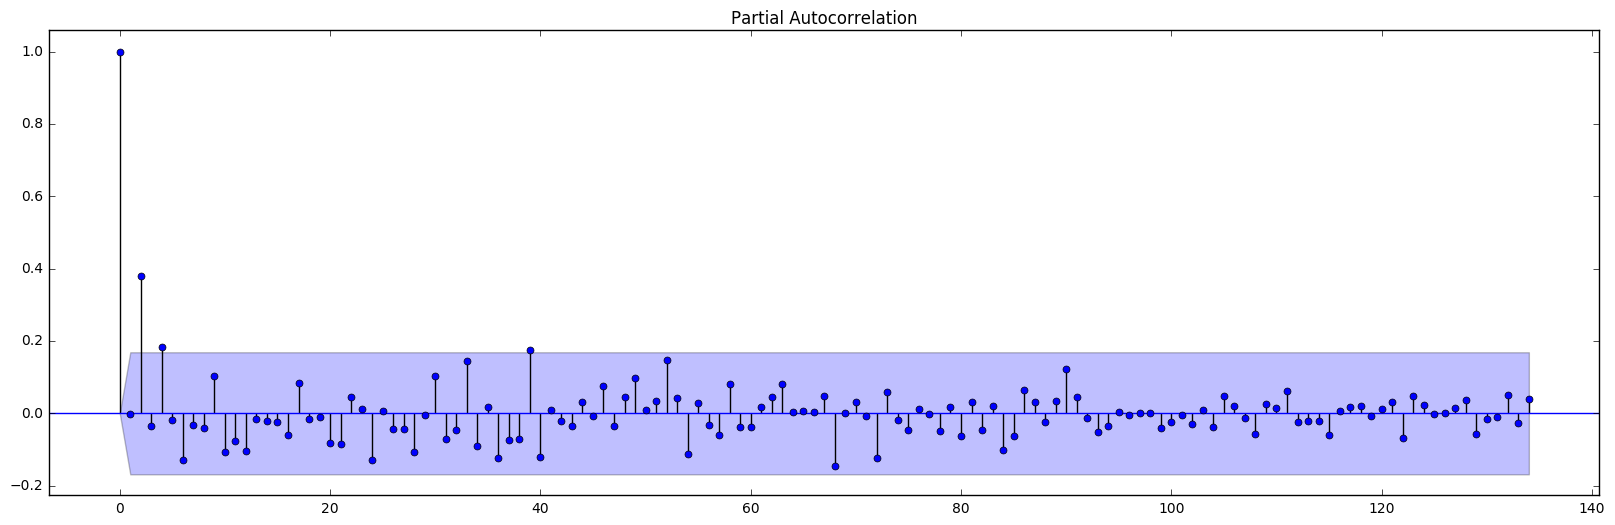

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf(store1.Sales, lags=10)
# plot_pacf(store1.Sales, lags=10)

print plot_acf(store1_wk)
print plot_pacf(store1_wk)

In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [35]:
model = ARIMA(store1_wk, (1,2,3)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                  133
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -1082.682
Method:                       css-mle   S.D. of innovations            803.818
Date:                Thu, 22 Dec 2016   AIC                           2177.364
Time:                        11:45:39   BIC                           2194.707
Sample:                    01-20-2013   HQIC                          2184.412
                         - 08-02-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              0.0175      0.511      0.034      0.973        -0.983     1.018
ar.L1.D2.Sales    -0.8235      0.090     -9.118      0.000        -1.001    -0.646
ma.L1.D2.Sales    -1.0981      0.126     -8.685      0.000        -1.346    -0.850
ma.L2.D2.Sales    -0.3116      0.203     -1.532      0.128        -0.710     0.087
ma.L3.D2.Sales     0.4098      0.118      3.465      0.001         0.178     0.642
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2143           +0.0000j            1.2143            0.5000
MA.1           -1.6865           +0.0000j            1.6865            0.5000
MA.2            1.0002           +0.0000j            1.0002            0.0000
MA.3            1.4468           +0.0000j            1.4468            0.0000
-----------------------------------------------------------------------------
"""

Figure(1440x432)


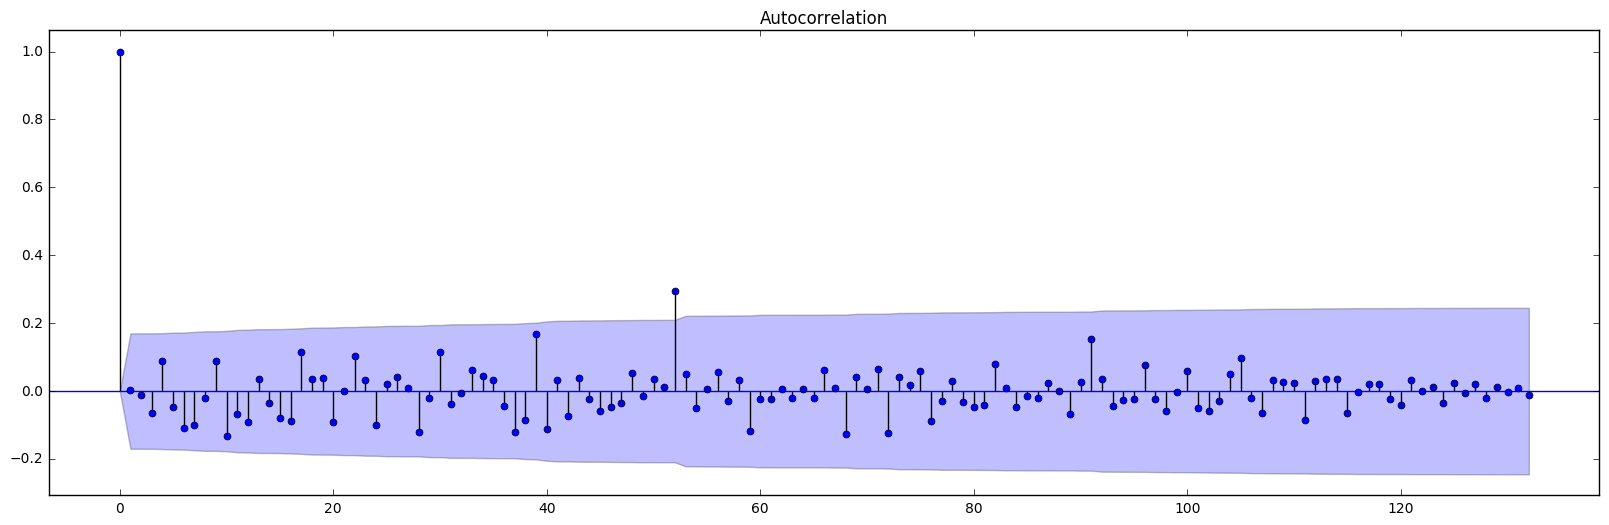

In [39]:
print plot_acf(model.resid)

In [41]:
test_stationarity(model)

AttributeError: 'ARIMAResults' object has no attribute 'rolling'

In [15]:
from statsmodels.tsa.arima_model import ARMA

#store1s = store1_wk[['Sales']].astype(float)

In [16]:
fcast = store1_wk.forecast(54)
total = np.concatenate((store1_wk,fcast[0]), axis=0)

plt.figure()
plt.plot(total)
plt.plot(fcast[0], "r--")

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called forecast(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


AttributeError: 'Series' object has no attribute 'forecast'

By passing the (1, 0) in the second argument, we are fitting an ARMA model as ARMA(p=1, q=1). Remember, an ARMA(p, q) model is AR(p) + MA(q). This means that an ARMA(1, 0) is the same as an AR(1) model.

In this AR(1) model we learn an intercept value, or base sales values. Additionally, we learn a coefficient that tells us how to include the last sales values. In this case, we take the intercept of ~4700 and add in the previous months sales * 0.68.

Note the coefficient here does not match the lag 1 autocorrelation - implying the the data is not stationary.

We can learn an AR(2) model, which regresses each sales value on the last two, with the following:

In [11]:
# arma20


In [12]:
# plot residuals


In [13]:
# plot acf


In [14]:
# plot actual vs. predicted


In [15]:
# model ARMA11


In [16]:
# plot residuals


In [17]:
# plot acf


In [18]:
# plot actual vs. predicted


## ARIMA

In [19]:
# build arima202


In [20]:
# create ARIMA210 model
arima210.plotpredict

In [ ]:
arima210.summary()

In [21]:
# calculate autocorr of differenced sales data


In [22]:
# plot differenced sales data


In [23]:
# plot_predict


In [24]:
# plot residuals


In [25]:
# plot acf


In [26]:
# plot actual vs. predicted


In [27]:
# arima712


What would the effect on our model be if we were to increase the p, q, and d terms?

- Increasing p would increase the dependency on previous values further (longer lag), but this isn't necessary past a given point.
- Increasing q would increase the dependency of an unexpected jump at a handful of points, but we did not observe that in our autocorrelation plot.
- Increasing d would increase differencing, but with d=1 we saw a move towards stationarity already (except at a few problematic regions). Increasing to 2 may be useful if we are saw an exponential trend, but that we did not here.

There are variants of ARIMA that will handle the seasonal aspect better, known as Seasonal ARIMA. In short, these models fit two ARIMA models, one of the daily frequency and another on the seasonal frequency (monthly or yearly, whichever the pattern may be). We will be revisiting this topic later as we discuss ways to further tune the ARIMA model to the dataset provided.

In [42]:
! pip list

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
alabaster (0.7.9)
anaconda-clean (1.0)
anaconda-client (1.6.0)
anaconda-navigator (1.3.2)
appnope (0.1.0)
appscript (1.0.1)
argcomplete (1.0.0)
astroid (1.4.7)
astropy (1.2.1)
Babel (2.3.4)
backports-abc (0.5)
backports.shutil-get-terminal-size (1.0.0)
backports.ssl-match-hostname (3.4.0.2)
beautifulsoup4 (4.5.1)
bitarray (0.8.1)
blaze (0.10.1)
bleach (1.5.0)
bokeh (0.12.3)
boto (2.43.0)
Bottleneck (1.1.0)
CacheControl (0.11.7)
cdecimal (2.3)
certifi (2015.4.28)
cffi (1.9.1)
chest (0.2.3)
click (6.6)
cloudpickle (0.2.1)
clyent (1.2.2)
colorama (0.3.7)
conda (4.2.13)
conda-build (2.0.11)
conda-verify (2.0.0)
configobj (5.0.6)
configparser (3.5.0)
contextlib2 (0.5.4)
cryptography (1.6)
cycler (0.10.0)
Cython (0.25.2)
cytoolz (0.8.1)
dask (0.12.0)
datashape (0.5.2)
decorator (4.0

In [43]:
! pip list

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
alabaster (0.7.9)
anaconda-clean (1.0)
anaconda-client (1.6.0)
anaconda-navigator (1.3.2)
appnope (0.1.0)
appscript (1.0.1)
argcomplete (1.0.0)
astroid (1.4.7)
astropy (1.2.1)
Babel (2.3.4)
backports-abc (0.5)
backports.shutil-get-terminal-size (1.0.0)
backports.ssl-match-hostname (3.4.0.2)
beautifulsoup4 (4.5.1)
bitarray (0.8.1)
blaze (0.10.1)
bleach (1.5.0)
bokeh (0.12.3)
boto (2.43.0)
Bottleneck (1.1.0)
CacheControl (0.11.7)
cdecimal (2.3)
certifi (2015.4.28)
cffi (1.9.1)
chest (0.2.3)
click (6.6)
cloudpickle (0.2.1)
clyent (1.2.2)
colorama (0.3.7)
conda (4.2.13)
conda-build (2.0.11)
conda-verify (2.0.0)
configobj (5.0.6)
configparser (3.5.0)
contextlib2 (0.5.4)
cryptography (1.6)
cycler (0.10.0)
Cython (0.25.2)
cytoolz (0.8.1)
dask (0.12.0)
datashape (0.5.2)
decorator (4.0